In [77]:
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Gaussian distribution
### Generation sample by rolling dices many times

In [72]:
def rollDice():
    return random.randint(1, 6)
    
def generate():
    N = 10000
    trials = {}
    for i in range(N):
        d1 = rollDice()
        d2 = rollDice()
        s = d1 + d2
        trials[s] = trials.get(s, 0) + 1
    return trials

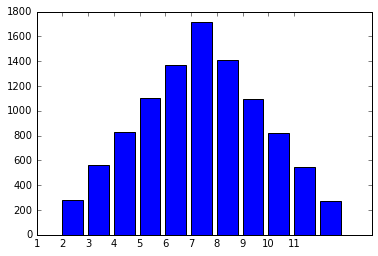

In [73]:
data = generate()
plt.bar(data.keys(), data.values())
plt.xticks(range(1, 12))
plt.show()

## Cumulative Distribution

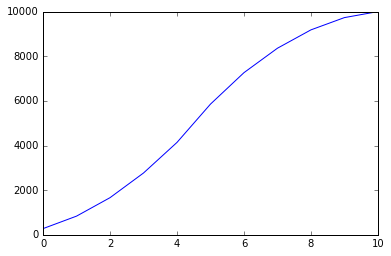

In [83]:
def calcCumulativeDist(data):
    s = {}
    for i, v in enumerate(data.values()):
        s[i] = s.get(i - 1, 0) + v
    return s

def takeSamples(rangeFrom, rangeTo, n):
    return [random.randint(rangeFrom, rangeTo) for i in range(n)]

cumulativDist = calcCumulativeDist(data)

a = takeSamples(cumulativDist.values()[0], cumulativDist.values()[-1], 20)
plt.plot(cumulativDist.keys(), cumulativDist.values())
plt.show()